In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline

import webscrape

In [11]:
athlete = "stephen curry"
season = "2014-15"
web_df = webscrape.getData(athlete, season[:-3])

In [12]:
def shot(s_type):
    if "jump shot" in s_type.lower():
        return "jump"
    elif "layup shot" in s_type.lower():
        return "layup"
    else:
        return "else"
    
def shot_dist(dist):
    if dist < 8:
        return "less than 8"
    elif dist < 16:
        return "8-16"
    elif dist < 24:
        return "16-24"
    else:
        return "24+"
    
def def_dist(dist):
    if dist < 2:
        return "0-2"
    elif dist < 4:
        return "2-4"
    elif dist < 6:
        return "4-6"
    else:
        return "6+"

In [15]:
logistic = LogisticRegression()

In [13]:
def transform_web(data):
    data = data.copy()
    shot_type = pd.get_dummies(data["Shot Type"].apply(shot))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : float(x.replace("ft.", "")))
    shot_clock = data["Shot Clock"].apply(lambda x: float(x))
    touch_time = data["Touch Time"].apply(lambda x: float(x))
    drib = data["Drib."].apply(lambda x: int(x))
    data["Def Dist."] = data["Def Dist."].apply(lambda x: float(x))

    def_dist_c = pd.get_dummies(data["Def Dist."].apply(def_dist))

    
    shot_dist_c = pd.get_dummies(data["Shot Dist."].apply(shot_dist))
    
    con = [shot_type, shot_clock, touch_time, drib, data["Def Dist."],def_dist_c, shot_dist_c, (data["Made?"]=="Yes").astype(int)]
    new_shot_chart = pd.concat(con , axis=1)
    return new_shot_chart

tt = transform_web(web_df)
tt

,else,jump,layup,Shot Clock,Touch Time,Drib.,Def Dist.,0-2,2-4,4-6,6+,16-24,24+,8-16,less than 8,Made?
0,1,0,0,16.0,6.3,8,3.2,0,1,0,0,0,0,0,1,1
1,1,0,0,2.9,4.5,5,1.7,1,0,0,0,0,0,1,0,1
2,1,0,0,9.3,0.8,0,3.7,0,1,0,0,0,0,0,1,1
3,1,0,0,15.3,8.7,10,2.3,0,1,0,0,0,0,1,0,1
4,1,0,0,20.8,0.8,0,2.5,0,1,0,0,0,0,0,1,1
5,0,0,1,20.9,1.8,1,3.8,0,1,0,0,0,0,0,1,0
6,0,0,1,21.0,2.9,3,4.1,0,0,1,0,0,0,0,1,0
7,0,0,1,14.5,3.1,2,0.3,1,0,0,0,0,0,0,1,1
8,0,0,1,18.3,4.4,5,2.7,0,1,0,0,0,0,0,1,0
9,0,0,1,13.6,10.5,14,4.3,0,0,1,0,0,0,0,1,1


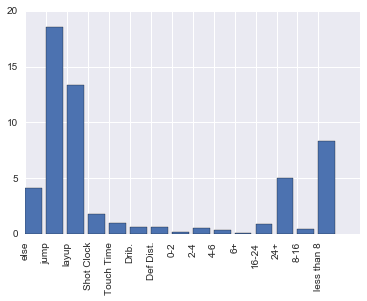

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

predictors = tt.columns[:-1]

selector = SelectKBest(k=5)
selector.fit(tt[predictors], tt["Made?"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), predictors, rotation="vertical")
plt.show()

In [97]:
def trials(n, model, X, pred1, pred2, y):

    x1_ma = np.zeros(n,)
    x2_ma = np.zeros(n,)
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5)
        model.fit(X_train[pred1], y_train)
        x1_ma[i] = model.score(X_test[pred1], y_test)
        
        model.fit(X_train[pred2], y_train)
        x2_ma[i] = model.score(X_test[pred2], y_test)

    print "X1", x1_ma.mean()
    print "X2", x2_ma.mean()
    print x1_ma.mean() - x2_ma.mean()
    print model.coef_
    return x1_ma - x2_ma

X1 0.57302533532
X2 0.607630402385
-0.0346050670641
[[ 0.31711638  0.09364533  0.07607378 -0.1333404   0.33478435 -0.73268739
   0.75139812]]


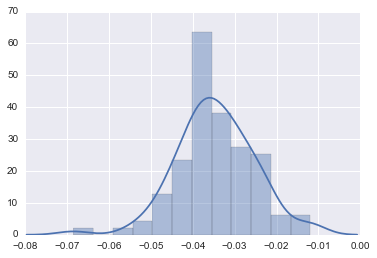

In [98]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8']
predictor2 = predictor1 + [u'else', u'jump', u'layup']
a = trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)

Adding the type of shot definitely helps the accuracy 

In [99]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Def Dist.']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.609478390462
X2 0.615111773472
-0.00563338301043
[[-0.1324427  -0.0832881   0.14379484  0.14847829  0.61164787 -0.89561618
   0.36051065  0.09311259]]


Adding defender distance also seems to helps the accuracy

In [100]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ [u'0-2',u'2-4',u'4-6', u'6+']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.608301043219
X2 0.603532041729
0.00476900149031
[[ 0.01112231  0.06207442  0.19602153  0.01132191  0.3663715  -0.75636826
   0.67053694 -0.46550875  0.11569868  0.1532014   0.47714885]]


Strangely when we binarize the defender distance, it seems to lower the accuracy

In [101]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Touch Time']
a=trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.605767511177
X2 0.604157973174
0.00160953800298
[[ 0.03884855  0.3686105   0.01522595  0.01744769  0.69338541 -0.89729318
   0.64404045 -0.03802328]]


In [102]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Shot Clock']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.605096870343
X2 0.60478390462
0.000312965722802
[[ 0.09960512 -0.05340484  0.30307835 -0.1399905   0.47571794 -0.9408995
   0.67446969  0.02021865]]


Both touch time and shot clock does not really seem to help the model's performance

In [31]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup', 'Def Dist.']

Just looking at stephs is misleading and it could be overfitting to his shots
also we do not have enough shots and we would like more
Lets create a guard model and 

In [69]:
x = webscrape.getData("TJ McConnell", "2014")
x.shape

(0, 13)

In [121]:
guards_100 = [
    "James Harden", "Kemba Walker", "Kyle Lowry", "DeMar DeRozan", "Kentavious Caldwell-Pope", "John Wall", "CJ McCollum", 
    "Russell Westbrook", "Monta Ellis", "Joe Johnson", "Stephen Curry", "Damian Lillard", 
    "Klay Thompson", "Wesley Matthews", "Isaiah Thomas", "Evan Fournier", "Jordan Clarkson", "Rodney Hood", 
    "Rajon Rondo", "Avery Bradley", "George Hill", "Jimmy Butler", "Gary Harris", "Reggie Jackson", "Chris Paul",
    "Kyle Korver", "Victor Oladipo", "Arron Afflalo", "Goran Dragic", "J.R. Smith", "Will Barton", "Courtney Lee",
    "Ricky Rubio", "Zach LaVine", "Evan Turner", "D'Angelo Russell", "Dwyane Wade", "Jeff Teague", "Ish Smith", 
    "Darren Collison", "Raymond Felton", "Hollis Thompson", "Dion Waiters", "Elfrid Payton", "Jamal Crawford", 
    "Bojan Bogdanovic", "Devin Booker", "Deron Williams", "Allen Crabbe", "JJ Redick", "Derrick Rose", "Kent Bazemore",
    "Emmanuel Mudiay", "Danny Green", "Jeremy Lin", "Cory Joseph", "Patrick Beverley", "Langston Galloway", 
    "Jose Calderon", "Tony Parker", "Isaiah Canaan", "Garrett Temple", "Lou Williams", "Brandon Knight",
    "Matthew Dellavedova", "Kobe Bryant", "Jrue Holiday", "Nik Stauskas", "Mike Conley", "Thabo Sefolosha", 
    "Shane Larkin", "Andre Iguodala", "Bradley Beal", "Shabazz Muhammad", "Marco Belinelli", 
    "Kyrie Irving", "Ramon Sessions", "Marcus Smart", "Patty Mills", "Michael Carter-Williams", "Randy Foye", 
    "Alonzo Gee", "Dennis Schroder", "Tony Allen", "Wayne Ellington", "TJ McConnell", "Gerald Green", "Andre Roberson",
    "Shaun Livingston", "Jerryd Bayless", "Raul Neto", "Eric Gordon", "CJ Miles", "Austin Rivers", "Ben McLemore", 
    "Gerald Henderson", "Ty Lawson", "Mario Chalmers", "Lance Stephenson"]
a = []
for player in guards_100:
    print player
    a.append(webscrape.getData(player, "2014"))
    
big = pd.concat(a)

James Harden
Kemba Walker
Kyle Lowry
DeMar DeRozan
Kentavious Caldwell-Pope
John Wall
CJ McCollum
Russell Westbrook
Monta Ellis
Joe Johnson
Stephen Curry
Damian Lillard
Klay Thompson
Wesley Matthews
Isaiah Thomas
Evan Fournier
Jordan Clarkson
Rodney Hood
Rajon Rondo
Avery Bradley
George Hill
Jimmy Butler
Gary Harris
Reggie Jackson
Chris Paul
Kyle Korver
Victor Oladipo
Arron Afflalo
Goran Dragic
J.R. Smith
Will Barton
Courtney Lee
Ricky Rubio
Zach LaVine
Evan Turner
D'Angelo Russell
Dwyane Wade
Jeff Teague
Ish Smith
Darren Collison
Raymond Felton
Hollis Thompson
Dion Waiters
Elfrid Payton
Jamal Crawford
Bojan Bogdanovic
Devin Booker
Deron Williams
Allen Crabbe
JJ Redick
Derrick Rose
Kent Bazemore
Emmanuel Mudiay
Danny Green
Jeremy Lin
Cory Joseph
Patrick Beverley
Langston Galloway
Jose Calderon
Tony Parker
Isaiah Canaan
Garrett Temple
Lou Williams
Brandon Knight
Matthew Dellavedova
Kobe Bryant
Jrue Holiday
Nik Stauskas
Mike Conley
Thabo Sefolosha
Shane Larkin
Andre Iguodala
Bradley Beal

TypeError: cannot convert the series to <type 'int'>

In [120]:
big = pd.concat(a)
big

TypeError: cannot concatenate a non-NDFrame object

In [118]:
def transform_big(data):
    data = data.copy()
    shot_type = pd.get_dummies(data["Shot Type"].apply(shot))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : float(x.replace("ft.", "")))
    shot_clock = data["Shot Clock"].apply(lambda x: float(x))
    touch_time = data["Touch Time"].apply(lambda x: float(x))
    drib = data["Drib."].apply(lambda x: int(x))
    data["Def Dist."] = data["Def Dist."].apply(lambda x: float(x))

    def_dist_c = pd.get_dummies(data["Def Dist."].apply(def_dist))
    
    player_c = pd.get_dummies(data["Player"])

    shot_dist_c = pd.get_dummies(data["Shot Dist."].apply(shot_dist))
    
    con = [player_c, shot_type, shot_clock, touch_time, drib, data["Def Dist."],
           def_dist_c, shot_dist_c, data["Shot Dist."],(data["Made?"]=="Yes").astype(int)]
    
#     con = [player_c, shot_type, shot_clock, touch_time, drib, 
#            shot_dist_c, data["Shot Dist."],(data["Made?"]=="Yes").astype(int)]
        
    new_shot_chart = pd.concat(con , axis=1)

    return new_shot_chart

df_guards = transform_big(big)

ValueError: could not convert string to float: 

In [105]:
len(guards_100)
df_guards.columns[:90]

Index([u'Allen Crabbe', u'Alonzo Gee', u'Andre Iguodala', u'Andre Roberson',
       u'Arron Afflalo', u'Austin Rivers', u'Avery Bradley', u'Ben McLemore',
       u'Bojan Bogdanovic', u'Bradley Beal', u'Brandon Knight', u'CJ McCollum',
       u'CJ Miles', u'Chris Paul', u'Cory Joseph', u'Courtney Lee',
       u'Damian Lillard', u'Danny Green', u'Darren Collison', u'DeMar DeRozan',
       u'Dennis Schroder', u'Deron Williams', u'Derrick Rose', u'Dion Waiters',
       u'Dwyane Wade', u'Elfrid Payton', u'Eric Gordon', u'Evan Fournier',
       u'Evan Turner', u'Garrett Temple', u'Gary Harris', u'George Hill',
       u'Gerald Green', u'Goran Dragic', u'Hollis Thompson', u'Isaiah Canaan',
       u'Isaiah Thomas', u'Ish Smith', u'JJ Redick', u'JR Smith',
       u'Jamal Crawford', u'James Harden', u'Jeff Teague', u'Jeremy Lin',
       u'Jerryd Bayless', u'Jimmy Butler', u'Joe Johnson', u'John Wall',
       u'Jordan Clarkson', u'Jose Calderon', u'Jrue Holiday', u'Kemba Walker',
       u'Kent Baz

In [112]:
predictor = df_guards.columns[:90].tolist()
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8']
predictor2 = predictor1 + [u'else', u'jump', u'layup']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.594167361067
X2 0.622668739183
-0.0285013781168
[[ 0.07950078 -0.35260532  0.07459305 -0.32151729  0.06812245 -0.01206699
  -0.0025428   0.06077672  0.06186617  0.10847801  0.09250015 -0.03097827
  -0.08807339  0.27448047  0.24773355  0.28021148 -0.00488158  0.20919332
   0.06726752 -0.08261316 -0.03964783 -0.17235369 -0.07520296 -0.26111083
   0.00797113 -0.30766026  0.04378701 -0.08845907  0.02802078 -0.12722284
  -0.42302051  0.32014336 -0.06055692  0.07415704  0.06945367 -0.05273425
   0.01633702 -0.21509773  0.42942007  0.06581437 -0.00887592 -0.0717966
   0.12314269 -0.06942745 -0.06052409 -0.04476656  0.10155419 -0.09907404
   0.02841619  0.38807108 -0.18445722 -0.09121069 -0.23515469 -0.11987393
   0.18988233 -0.26466216  0.46270374 -0.11344437  0.1657525  -0.1161452
   0.0885927  -0.72766887  0.11686152 -0.19985144  0.0744733  -0.25214826
  -0.01721646  0.00593622 -0.05870668 -0.2247343  -0.10124771 -0.1705261
  -0.33496097 -0.11109452 -0.07453888  0.18415377 -0.02586427 

In [107]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Def Dist.']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

KeyError: "['Def Dist.'] not in index"

In [108]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ [u'0-2',u'2-4',u'4-6', u'6+']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

KeyError: "[u'0-2' u'2-4' u'4-6' u'6+'] not in index"

In [116]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Touch Time']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.622553041472
X2 0.622509454522
4.35869495544e-05
[[-0.03790992 -0.2520342   0.0629212  -0.24586382  0.15613029  0.09235639
   0.08293806  0.03103268  0.07670964 -0.0069956  -0.00329521  0.09579277
  -0.01684756  0.44106209  0.32688464  0.23310115  0.10816806  0.26572691
   0.16127872 -0.11972193 -0.13129298  0.01288318 -0.10492041 -0.19753634
   0.11559245 -0.16386405 -0.0702905  -0.05103387  0.01809312 -0.23861379
  -0.5100427   0.25959434  0.03048929  0.17013452 -0.02226012  0.08898081
  -0.04012055 -0.22225559  0.38181736  0.24592833  0.03961718  0.10420938
   0.19166243 -0.08948582  0.25410113  0.05254552  0.20614637  0.10292949
   0.01534441 -0.02788065  0.13844185 -0.15246928 -0.22013677 -0.10790675
   0.24894831 -0.08490174  0.55265014  0.02563268  0.22560488 -0.02303685
   0.10402633 -0.1835369  -0.0676133  -0.10865863 -0.08417349 -0.23831471
   0.06712528  0.03303084 -0.14416809  0.03133626 -0.02856107 -0.06471643
  -0.41747747  0.02496509 -0.24255566  0.05763971 -0.12586

In [ ]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Shot Clock']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

In [ ]:
forward_100 = [
"Gordon Hayward", "Trevor Ariza", "Marcus Morris", "Khris Middleton", "Andrew Wiggins", "Giannis Antetokounmpo", 
"Paul George", "Draymond Green", "LeBron James", "Paul Millsap", "Al Horford", "Kevin Durant", "P.J. Tucker",
 "Carmelo Anthony", "Tobias Harris", "Serge Ibaka", "Nicolas Batum", "Kevin Love", "Jabari Parker", "Thaddeus Young", 
 "Luol Deng", "Kawhi Leonard", "Rudy Gay", "Dirk Nowitzki", "Al-Farouq Aminu", "Marvin Williams", "Jae Crowder", 
 "Pau Gasol", "Julius Randle", "Otto Porter", "Tristan Thompson", "LaMarcus Aldridge", "Jeff Green", "Justise Winslow",
  "Matt Barnes", "Anthony Davis", "Jared Dudley", "Mason Plumlee", "Jerami Grant", "Kristaps Porzingis", "Harrison Barnes",
   "Patrick Patterson", "Zach Randolph", "Ryan Anderson", "Derrick Favors", "Dante Cunningham", "Nerlens Noel", "Taj Gibson",
    "Jared Sullinger", "Robert Covington", "Ersan Ilyasova", "Omri Casspi", "Aaron Gordon", "Doug McDermott", 
    "Danilo Gallinari", "Amir Johnson", "Chandler Parsons", "Chris Bosh", "Cody Zeller", "Terrence Ross", 
    "Frank Kaminsky", "Kenneth Faried", "Stanley Johnson", "Mirza Teletovic", "Ed Davis", "Corey Brewer", 
    "Wesley Johnson", "Nikola Mirotic", "Luis Scola", "Trevor Booker", "Markieff Morris", "Lavoy Allen", "Tim Duncan", 
    "Darrell Arthur", "Tayshaun Prince", "Maurice Harkless", "JaMychal Green", "Derrick Williams", "Mario Hezonja", 
    "Willie Cauley-Stein", "David West", "Kelly Olynyk", "Boris Diaw", "Trey Lyles", "Myles Turner", "Brandon Bass", 
    "Anthony Tolliver", "Richard Jefferson", "Lance Thomas", "Luc Mbah a Moute", "Larry Nance Jr.", "Jon Leuer", 
    "Joe Ingles", "Paul Pierce", "Channing Frye", "Jason Smith", "Jonas Jerebko", "Noah Vonleh", "Blake Griffin", "Mike Scott"
]

